\newpage

1. Since we have the websit, we can see this is a binary classification problem to predict whether a patient has heart disease using 13 clinical features.

Features: `age`, `sex`, `chest pain type (cp)`, `resting blood pressure (trestbps)`, `cholesterol (chol)`, `fasting blood sugar (fbs)`, `electrocardiographic results (restecg)`, `maximum heart rate (thalach)`, `exercise-induced angina (exang)`, `ST depression (oldpeak)`, `slope of peak exercise ST segment (slope)`, `number of major vessels colored by fluoroscopy (ca)`, and `thalassemia type (thal)`. 

Target Variable: `num (original values 0-4)` (need transformed to binary，1 = have heart disease, 0 = no heart disease).

In [1]:
#2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns  

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import adjusted_rand_score

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"  
df = pd.read_csv(url, names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])  
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
df.replace('?', np.nan, inplace=True)  
df.dropna(inplace = True)  
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)  
df.drop('num', axis = 1, inplace = True) 

Since we already see that there are some `?` and the presence or absence of heart disease has a scale other than 0 and 1, so we need to do data transformations.

The target variable `num` needs to be recoded into a binary format and 0 will represent the absence of disease, 1 will signify the presence of disease. This binary representation simplifies the classification task and aligns with the requirements of many predictive models. 

And we also remove the rows containing these missing values which is the rows have `?`. This approach is a common data cleaning strategy, albeit it may lead to a reduction in the sample size. However, it helps maintain the integrity and reliability of the data for subsequent analysis.

In [4]:
#3
print(df.shape[0], df.shape[1])
print(df.dtypes)  
print(df.describe())  

297 14
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.0000

By our code, we can see after omitting the missing values, the dataset comprises 297 observations and encompasses 13 distinct features. Although variable `ca` is a integer in the websit, but it means number of major vessels (0-3) colored by flourosopy, which shows it actually is a categorical variable. In conclusion， we have:

Numerical Variables: `age`, `trestbps`, `chol`, `thalach` and `oldpeak`.

Categorical variables: `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca` and `thal`.

Target variable: `num`.

For the variable cp, which pertains to the type of chest pain, there are 4 distinct categories. Here, a value of 0 corresponds to typical angina, while values 1 through 3 signify different forms of atypical pain, each potentially indicative of different underlying pathologies. Regarding the target variable, it is observed that 54% of the patients in the dataset have been diagnosed with heart disease. This relatively balanced distribution, with a minimal class imbalance, bodes well for the development and evaluation of predictive models, as it reduces the potential bias that could arise from highly skewed class distributions.

In [5]:
#4
print(df['target'].value_counts()) 

target
0    160
1    137
Name: count, dtype: int64


Since we already transform the response num into a binary outcome, we just need to confirm the result after transform. After transform, 160 patients in the dataset did not have heart disease, and 137 patients were diagnosed with heart disease.

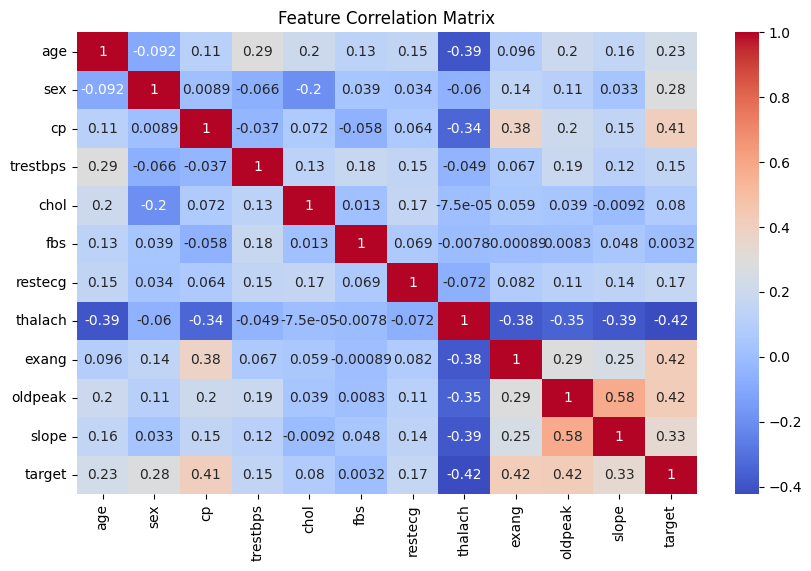

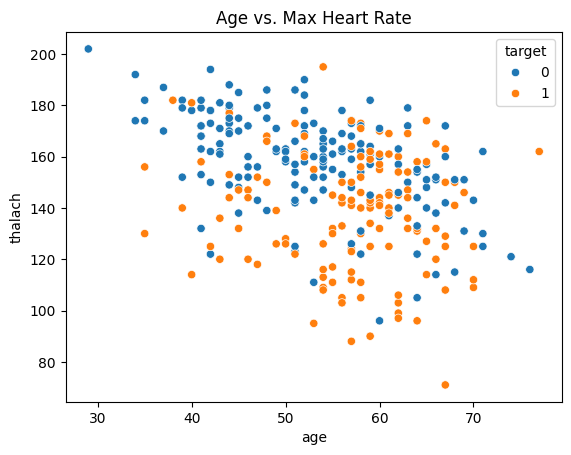

In [ ]:
#5
corr = df.corr(numeric_only=True)  
plt.figure(figsize=(10, 6))  
sns.heatmap(corr, annot=True, cmap='coolwarm')  
plt.title("Feature Correlation Matrix")  
plt.show()  

sns.scatterplot(x='age', y='thalach', hue='target', data=df)  
plt.title("Age vs. Max Heart Rate")  
plt.show() 

For Negative Correlation: There exists a negative correlation between age and thalach (maximum heart rate), with a correlation coefficient of -0.40. This implies that as patients get older, their maximum heart rates generally tend to be lower. Such a trend might potentially signify a decline in cardiovascular capacity, as the heart's ability to pump blood at a high rate diminishes with age.

For Key Predictors: The type of chest pain, represented by cp, and thalach, demonstrate a moderate level of correlation with the target variable. This indicates that these factors play a significant role in predicting the outcome and could potentially provide valuable insights into the diagnosis or prognosis. Notably, oldpeak (ST depression) exhibits a positive correlation with heart disease, registering a correlation coefficient of 0.36. This shows that an increase in ST depression, as measured by oldpeak, is associated with a higher likelihood of having heart disease, highlighting its importance as a predictor in the context of cardiovascular health.

\newpage

## Reference
Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1989). Heart Disease [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.
